This is the working notebook for the GW Project. based on https://iopscience.iop.org/article/10.3847/2041-8213/ab3800
and using software from https://www.gw-openscience.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests, os

%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q gwpy
    from gwpy.timeseries import TimeSeries   

Ordered roughly from smallest to most massive by source-frame chirp mass, the mergers considered in this paper are GW170608, GW151226, GW151012, GW170104, GW170814, GW170809, GW170818, GW150914, GW170823, and GW170729.



If we want to read in and analyze these, we need the times t0 which correspond to these events so that gwpy can fetch them. We would also want to decide the detector (i.e. Hannover or Livinngston etc)

Choose detector as H1, L1, or V1

GW170608  t0 = 1180922494.5

GW151226  t0 = 1135136350.6

GW151012  t0 = 1128678900.4

GW170104  t0 = 1167559936.6

GW170814  t0 = 1186741861.5

GW170809  t0 = 1186302519.8

GW170818  t0 = 1187058327.1

GW150914  t0 = 1126259462.4 

GW170823  t0 = 1187529256.5

GW170729  t0 = 1185389807.3



In [8]:
# Example: let's fetch one and look at it 

# -- Set a GPS time:
t0 = 1187008882.4  # GW170817 - the neutron star merger

# -- Set a GPS time:
#t0 = 1185389807.3  # GW170729 - the most massive chirp

#1180922494.5 # --GW170608

#-- Choose detector as H1, L1, or V1
detector = 'H1'


In [9]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5


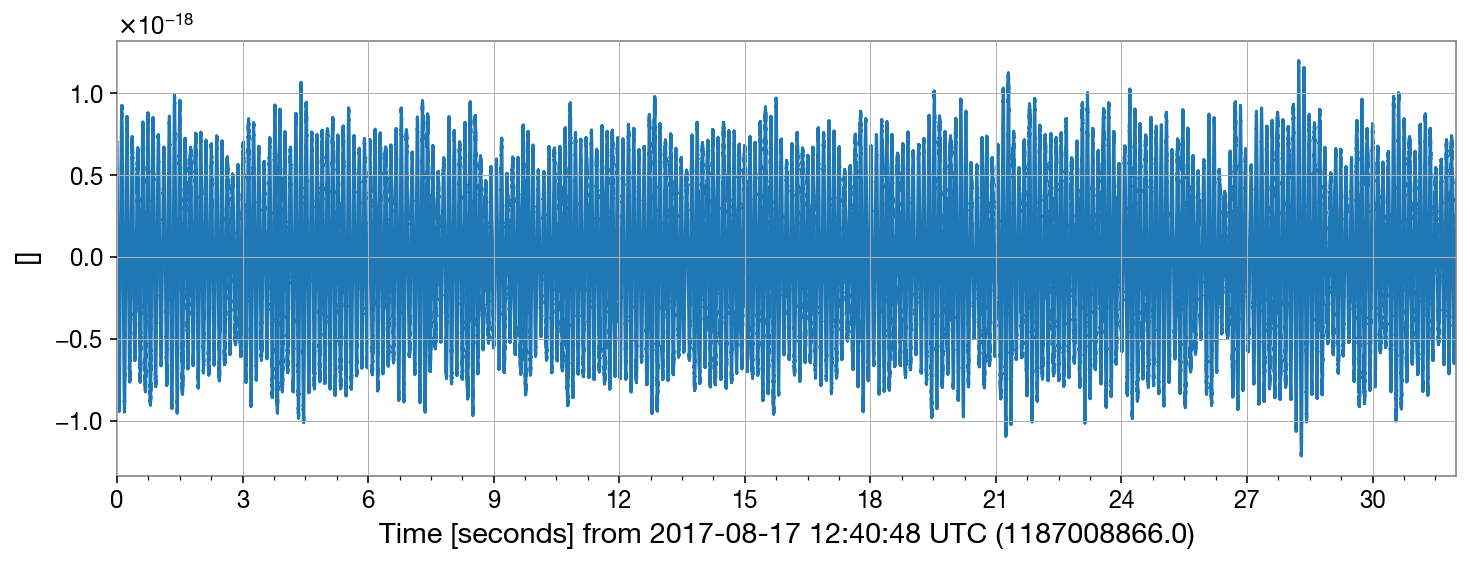

In [10]:
# -- Read the raw strain data
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

(1187008882.2, 1187008882.5)

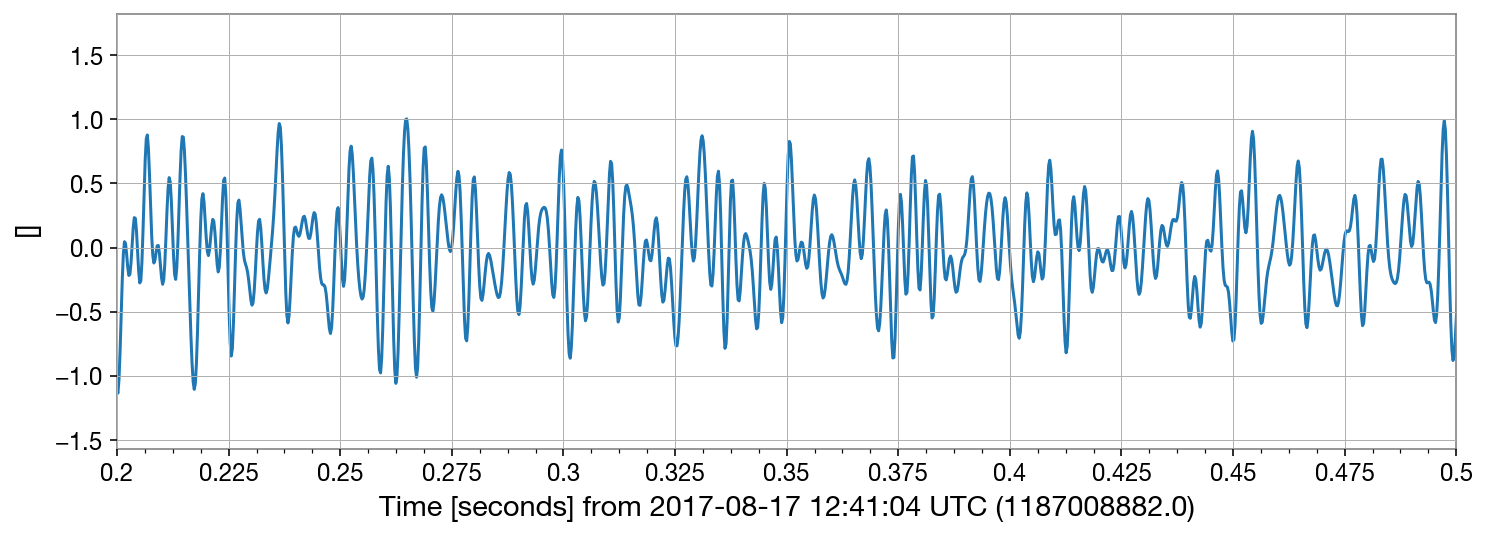

In [11]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

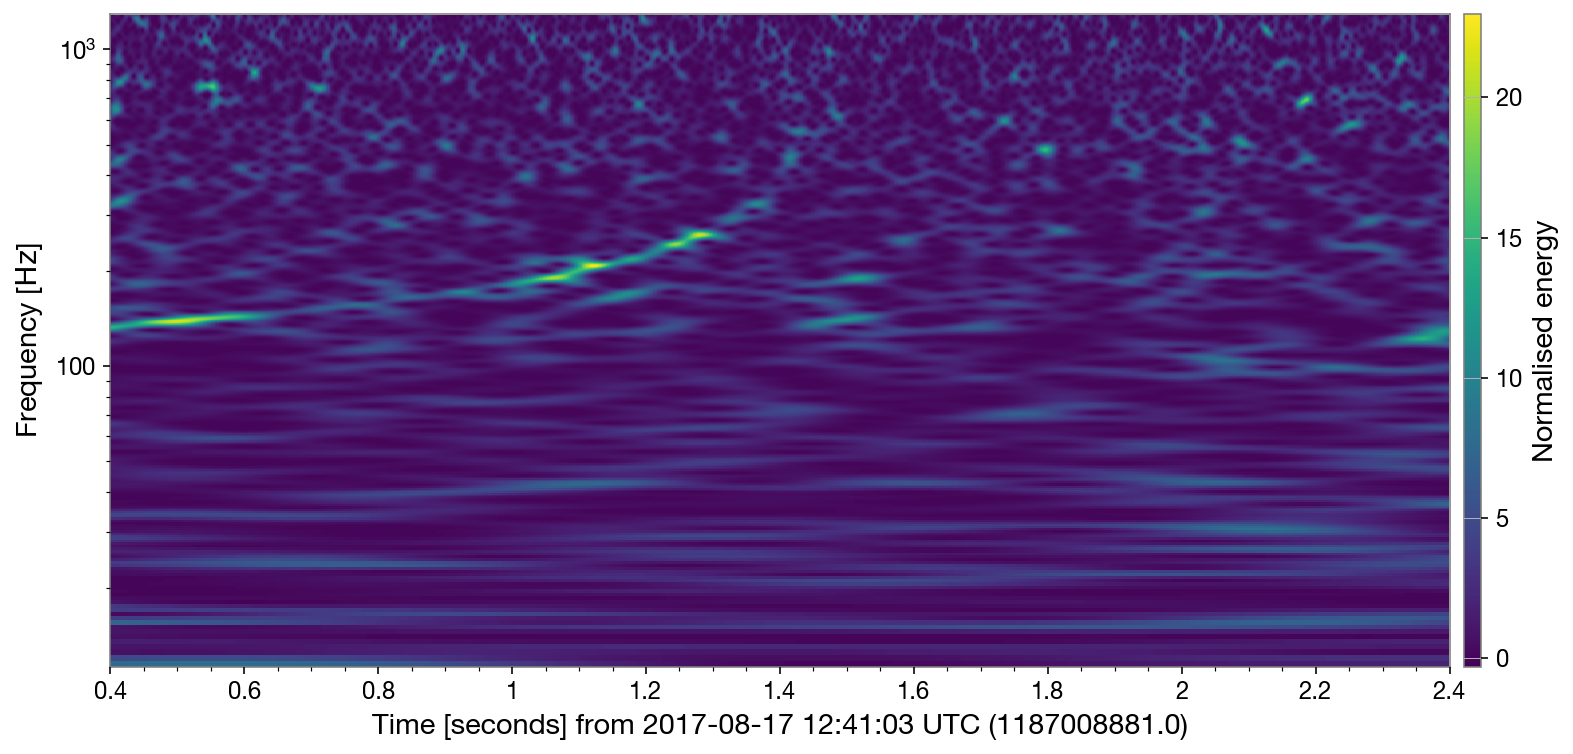

In [12]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')


Look here for json tables of data
https://www.gw-openscience.org/catalog/GWTC-1-confident/html/


In [13]:
#!pip install wget
#import wget
#!wget -O confident_table.json https://www.gw-openscience.org/catalog/GWTC-1-confident/json/

In [14]:
#!ls

In [16]:
#con_tab=pd.read_json('confident_table.json')
#con_tab.columns

#con_tab.data=pd.DataFrame(con_tab.data.values.tolist())['name']
#con_tab.groupby(['date','name','number'])['data'].apply(','.join).reset_index()

In [17]:
#con_tab.columns

In [18]:
#con_tab['data'][1]

Eww this is messy, try to read in as csv? I've made a csv in case you can't flatten this json file


## Reading in the masses

In [19]:
char_csv = './GW_table.csv' #'https://raw.githubusercontent.com/charlotteolsen/astrostats_GWproject/master/GW_table%20.csv?token=AHEQX66DQQ6LIVKSPRLCFES5Z3S6W'
csv_test = pd.read_csv(char_csv)

In [20]:
csv_test.columns

Index(['Event', 'Primary mass (M_sun)', 'Secondary mass (M_sun)',
       'Effective inspiral spin', 'chirp mass (M_sun)', 'Final spin',
       'Final mass (M_sun)', 'Luminosity distance (Mpc)'],
      dtype='object')

In [29]:
pm = csv_test['Primary mass (M_sun)']
sm = csv_test['Secondary mass (M_sun)']
cm = csv_test['chirp mass (M_sun)']
fm = csv_test['Final mass (M_sun)']
events = csv_test['Event']

print(pm.values)
print(sm)
print(events)

['35.6 +4.8-3.0' '23.3 +14.0-5.5' '13.7 +8.8-3.2'
 '31.0 +7.2-5.6' '10.9 +5.3-1.7' '50.6 +16.6-10.2'
 '35.2 +8.3-6.0' '30.7 +5.7-3.0' '1.46 +0.12-0.10'
 '35.5 +7.5-4.7' '39.6 +10.0-6.6']
0       30.6 +3.0-4.4
1       13.6 +4.1-4.8
2        7.7 +2.2-2.6
3       20.1 +4.9-4.5
4        7.6 +1.3-2.1
5      34.3 +9.1-10.1
6       23.8 +5.2-5.1
7       25.3 +2.9-4.1
8     1.27 +0.09-0.09
9       26.8 +4.3-5.2
10      29.4 +6.3-7.1
Name: Secondary mass (M_sun), dtype: object
0     GW150914
1     GW151012
2     GW151226
3     GW170104
4     GW170608
5     GW170729
6     GW170809
7     GW170814
8     GW170817
9     GW170818
10    GW170823
Name: Event, dtype: object


How to get just the masses:

In [22]:
testmass = np.float(pm.values[0][0:4])
print(testmass)

testerrup = np.float(pm.values[0][6:9])
print(testerrup)

testerrdown = np.float(pm.values[0][10:13])
print(testerrdown)

35.6
4.8
3.0


In [53]:
p_mass = []
p_uperr = []
p_dnerr = []
for i in range(len(pm.values)):
    mass = np.float(pm.values[i].split('+')[0])  #np.float(pm.values[i][0:4])
    p_mass.append(mass)
    errors = pm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    p_uperr.append(errup)
    errdown = np.float(errors[1])
    p_dnerr.append(errdown)
    print(pm.values[i])
    
    
####  How to do the error bars!!!!!!!!  YAY!!!
#mass = pm.values[5].split('+')[0]
#errors = pm.values[5].split('+')[1]
#errors = errors.split('-')
#print(mass, errors)
    
print(p_mass)
print(p_uperr)
print(p_dnerr)

35.6 +4.8-3.0
23.3 +14.0-5.5
13.7 +8.8-3.2
31.0 +7.2-5.6
10.9 +5.3-1.7
50.6 +16.6-10.2
35.2 +8.3-6.0
30.7 +5.7-3.0
1.46 +0.12-0.10
35.5 +7.5-4.7
39.6 +10.0-6.6
[35.6, 23.3, 13.7, 31.0, 10.9, 50.6, 35.2, 30.7, 1.46, 35.5, 39.6]
[4.8, 14.0, 8.8, 7.2, 5.3, 16.6, 8.3, 5.7, 0.12, 7.5, 10.0]
[3.0, 5.5, 3.2, 5.6, 1.7, 10.2, 6.0, 3.0, 0.1, 4.7, 6.6]


In [54]:
s_mass = []
s_uperr = []
s_dnerr = []
for i in range(len(sm.values)):
    mass = np.float(sm.values[i].split('+')[0])  
    s_mass.append(mass)
    errors = sm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    s_uperr.append(errup)
    errdown = np.float(errors[1])
    s_dnerr.append(errdown)
    print(sm.values[i])
    
print(s_mass)
print(s_uperr)
print(s_dnerr)

30.6 +3.0-4.4
13.6 +4.1-4.8
7.7 +2.2-2.6
20.1 +4.9-4.5
7.6 +1.3-2.1
34.3 +9.1-10.1
23.8 +5.2-5.1
25.3 +2.9-4.1
1.27 +0.09-0.09
26.8 +4.3-5.2
29.4 +6.3-7.1
[30.6, 13.6, 7.7, 20.1, 7.6, 34.3, 23.8, 25.3, 1.27, 26.8, 29.4]
[3.0, 4.1, 2.2, 4.9, 1.3, 9.1, 5.2, 2.9, 0.09, 4.3, 6.3]
[4.4, 4.8, 2.6, 4.5, 2.1, 10.1, 5.1, 4.1, 0.09, 5.2, 7.1]


In [55]:
c_mass = []
c_uperr = []
c_dnerr = []
for i in range(len(cm.values)):
    mass = np.float(cm.values[i].split('+')[0])  
    c_mass.append(mass)
    errors = cm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    c_uperr.append(errup)
    errdown = np.float(errors[1])
    c_dnerr.append(errdown)
    print(cm.values[i])
    
print(c_mass)
print(c_uperr)
print(c_dnerr)

28.6 +1.6-1.5
15.2 +2.0-1.1
8.9 +0.3-0.3
21.5 +2.1-1.7
7.9 +0.2-0.2
35.7 +6.5-4.7
25.0 +2.1-1.6
24.2 +1.4-1.1
1.186 +0.001-0.001
26.7 +2.1-1.7
29.3 +4.2-3.2
[28.6, 15.2, 8.9, 21.5, 7.9, 35.7, 25.0, 24.2, 1.186, 26.7, 29.3]
[1.6, 2.0, 0.3, 2.1, 0.2, 6.5, 2.1, 1.4, 0.001, 2.1, 4.2]
[1.5, 1.1, 0.3, 1.7, 0.2, 4.7, 1.6, 1.1, 0.001, 1.7, 3.2]


In [31]:
print(fm)

0       63.1 +3.3-3.0
1       35.7 +9.9-3.8
2       20.5 +6.4-1.5
3       49.1 +5.2-3.9
4       17.8 +3.2-0.7
5     80.3 +14.6-10.2
6       56.4 +5.2-3.7
7       53.4 +3.2-2.4
8                ≤2.8
9       59.8 +4.8-3.8
10      65.6 +9.4-6.6
Name: Final mass (M_sun), dtype: object


In [65]:
f_mass = []
f_uperr = []
f_dnerr = []
print(fm)
for i in range(len(fm.values)):
    if '≤' not in fm.values[i]:
        mass = fm.values[i].split('+')[0]    #np.float(fm.values[i].split('+≤')[0])  
        f_mass.append(mass)
        errors = fm.values[i].split('+')[1]
        errors = errors.split('-')
        errup = np.float(errors[0])
        f_uperr.append(errup)
        errdown = np.float(errors[1])
        f_dnerr.append(errdown)
    elif '≤' in fm.values[i]:
        mass = fm.values[i].strip('≤')
        #print('test:', mass)
        f_mass.append(mass)
        errup = np.float(0)
        f_uperr.append(errup)
        errdown = np.float(999)  ## Filler value to show that it is unbounded on the lower value....
        f_dnerr.append(errdown)

    
print(f_mass)
print(f_uperr)
print(f_dnerr)

0       63.1 +3.3-3.0
1       35.7 +9.9-3.8
2       20.5 +6.4-1.5
3       49.1 +5.2-3.9
4       17.8 +3.2-0.7
5     80.3 +14.6-10.2
6       56.4 +5.2-3.7
7       53.4 +3.2-2.4
8                ≤2.8
9       59.8 +4.8-3.8
10      65.6 +9.4-6.6
Name: Final mass (M_sun), dtype: object
['63.1 ', '35.7 ', '20.5 ', '49.1 ', '17.8 ', '80.3 ', '56.4 ', '53.4 ', '2.8', '59.8 ', '65.6 ']
[3.3, 9.9, 6.4, 5.2, 3.2, 14.6, 5.2, 3.2, 0.0, 4.8, 9.4]
[3.0, 3.8, 1.5, 3.9, 0.7, 10.2, 3.7, 2.4, 999.0, 3.8, 6.6]


In [66]:
eventlist = []

for i in range(len(events.values)):
    ev = events.values[i][0:8]
    eventlist.append(ev)
    print(events.values[i])
    
print(eventlist)
#

GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170817
GW170818
GW170823
['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823']


### Making some plots

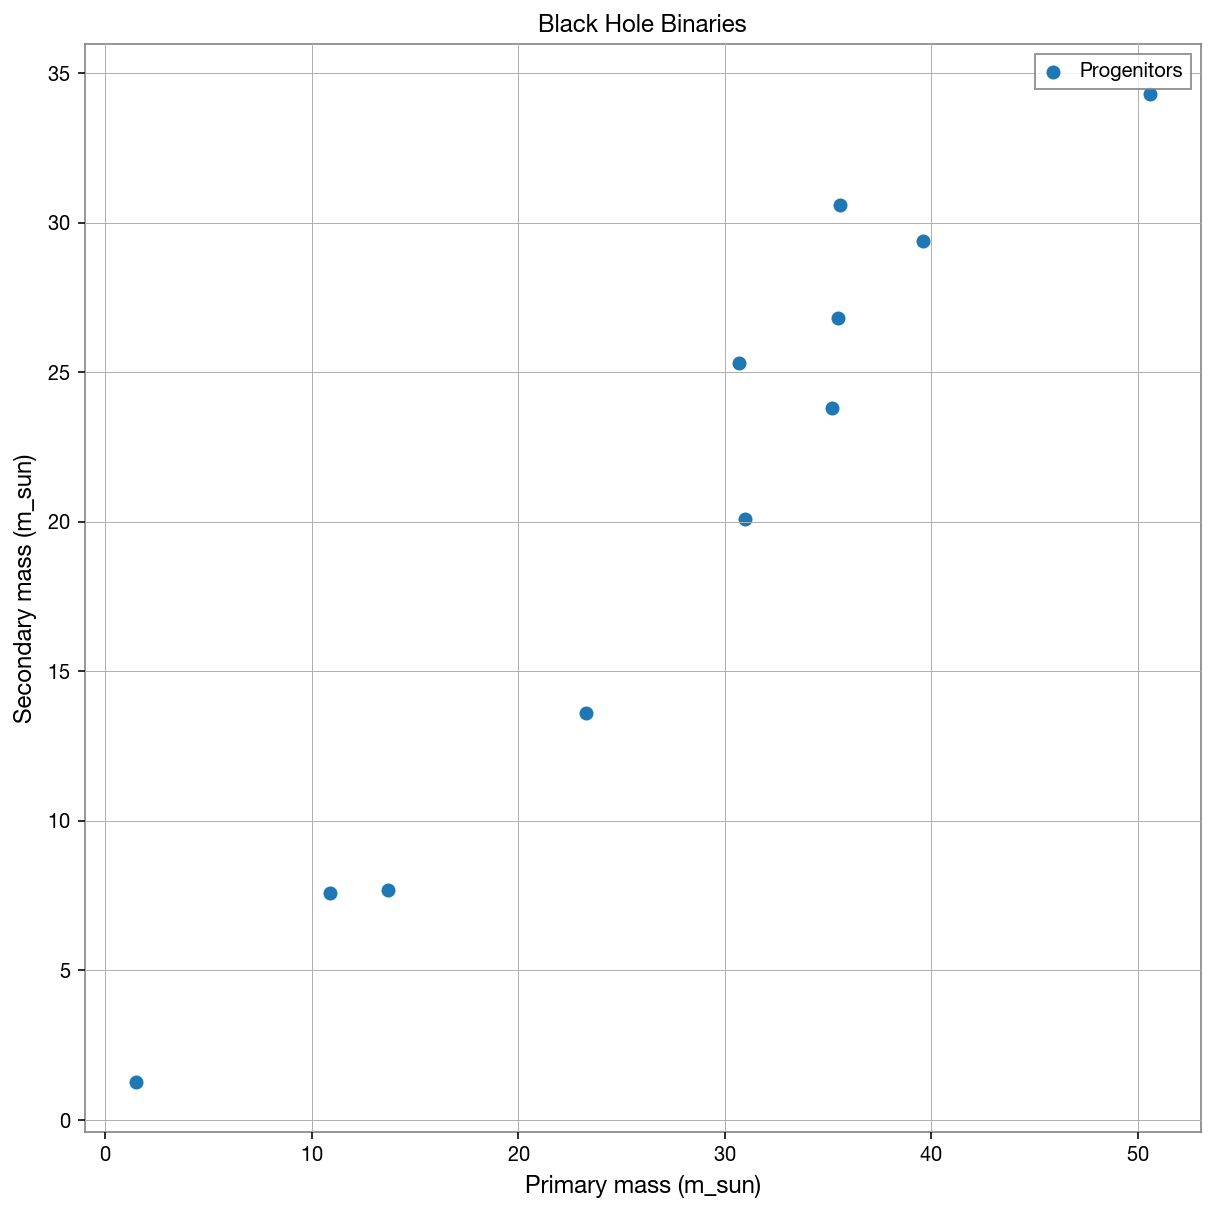

In [67]:
fig = plt.figure(figsize = (10,10))
plt.scatter(p_mass,s_mass, label = 'Progenitors')
plt.xlabel('Primary mass (m_sun)')
plt.ylabel('Secondary mass (m_sun)')
plt.title('Black Hole Binaries')
plt.legend()

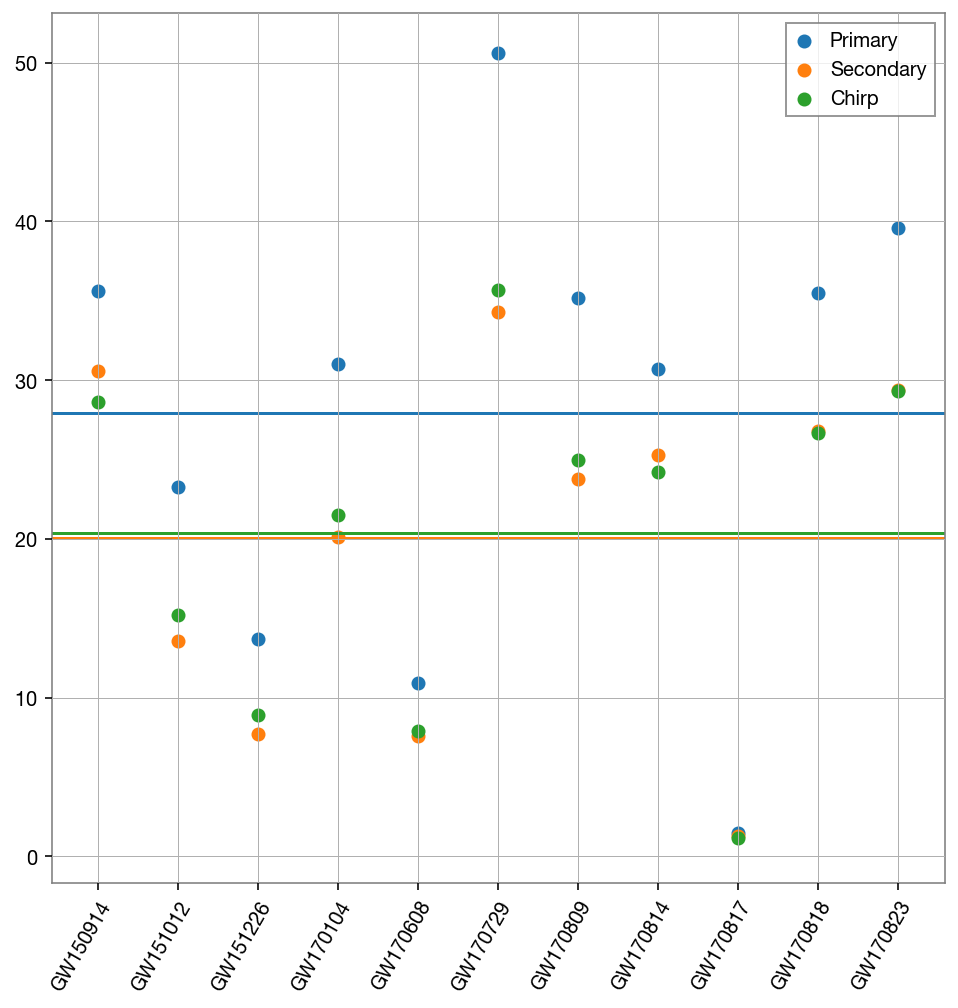

In [68]:
p_ave = np.mean(p_mass)
s_ave = np.mean(s_mass)
c_ave = np.mean(c_mass)

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(eventlist,p_mass, label = 'Primary')
ax.scatter(eventlist,s_mass, label = 'Secondary')
ax.scatter(eventlist,c_mass, label = 'Chirp')

ax.axhline(p_ave, color = 'C0')
ax.axhline(s_ave, color = 'C1')
ax.axhline(c_ave, color = 'C2')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

In [ ]:
##Plot luminosity distance vs chirp mass

plt.plot()

Can we extrapolate luminosity distances for marginal triggers given chirp mass and relation for above.

Given the chirp masses for the marginals, what are the possible primary and secondary masses?

My to do:  error bars, luminosity distance plots, read in marginal triggers

Make a model from confirmed detections and then fit values for the marginals

## Reading in Marginal masses

In [47]:
csv_test = pd.read_json('./marginal.json')

In [50]:
csv_test

,data,parameters
151008,"{'dq': {'best': 'No artifacts'}, 'far': {'best...",NaN
151012A,"{'dq': {'best': 'Artifacts present'}, 'far': {...",NaN
151116,"{'dq': {'best': 'No artifacts'}, 'far': {'best...",NaN
161202,"{'dq': {'best': 'Artifacts can account for'}, ...",NaN
161217,"{'dq': {'best': 'Artifacts can account for'}, ...",NaN
170208,"{'dq': {'best': 'Artifacts present'}, 'far': {...",NaN
170219,"{'dq': {'best': 'No artifacts'}, 'far': {'best...",NaN
170405,"{'dq': {'best': 'Artifacts present'}, 'far': {...",NaN
170412,"{'dq': {'best': 'Artifacts can account for'}, ...",NaN
170423,"{'dq': {'best': 'No artifacts'}, 'far': {'best...",NaN
